### Example 1: Eight Schools
学習指導方法の効率を評価・分析することが目的.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import seaborn as sns
import pystan

In [6]:
schools_code = """
data {
  int<lower=0> J;
  real y[J];
  real<lower=0> sigma[J];
}
parameters {
  real mu;
  real<lower=0> tau;
  real eta[J];
}
transformed parameters {
  real theta[J];
  for (j in 1:J)
  theta[j] = mu + tau * eta[j];
}
model {
  eta ~ normal(0,1);
  y ~ normal(theta, sigma);
}
"""

このモデルでは`theta`を直接`parameters`の中で宣言するのではなく、`transformed parameters`の中で`mu`と`tau`を利用して変換することにより、効率的にStanを実行できるようにしている.

また、今回は`schools_code`により表現されるモデルをPythonで直接記述しているが、他のファイルに記述して`sm = pystan.StanModel(file=<filename>)`のように呼び出すこともできる.自分はこちらの方が好きかもしれない.

呼び出すファイル名は`**.stan`のように、`stan`により利用されることがわかりやすいようにしておくと良い. ファイルの内容は、上記のモデルの宣言となんら変わりはない.

In [7]:
schools_dat = {"J": 8, "y": [28, 8, -3, 7, -1, 1, 18, 12], "sigma": [15, 10, 16, 11, 9, 11, 10, 18]}
sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

`fit`オブジェクトはstanがデータの事後分布からサンプリングした結果を格納している.
`fit`オブジェクトは多くのメソッドを持つ.
+ `plot`
+ `extract`
+ etc...
`fit`オブジェクトをそのままプリントすることもできるし、事後分布のサマリーを受け取ることも可能. 便利だ.

`fit.extract`を実行すると、モデルのパラメータとその推定結果の配列が組になった辞書を受け取れる.

In [8]:
la = fit.extract(permuted=True) # 辞書形式で受け取る
mu = la["mu"]

In [11]:
print(fit)

Inference for Stan model: anon_model_7d68f58472bf86176d69994d1f0e3fc5.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.11    0.16   5.07   -1.8   4.82   8.07   11.3  18.79   1015    1.0
tau        6.75    0.21   5.66   0.32   2.61   5.26   9.47  20.47    703    1.0
eta[0]     0.38    0.02   0.94   -1.5  -0.26    0.4   1.06   2.11   1672    1.0
eta[1]    -0.03    0.02    0.9   -1.8  -0.62  -0.05   0.58   1.77   1610    1.0
eta[2]    -0.22    0.02   0.89  -1.99  -0.82  -0.24   0.39   1.49   2000    1.0
eta[3]    -0.07    0.02   0.88  -1.83  -0.64  -0.06    0.5   1.71   1608    1.0
eta[4]    -0.36    0.02   0.84  -1.99  -0.92  -0.36    0.2   1.34   1565    1.0
eta[5]    -0.24    0.02   0.89  -2.04  -0.84  -0.24   0.35   1.52   1471    1.0
eta[6]     0.36    0.02   0.88  -1.41  -0.21   0.36   0.95   2.02   1562    1.0
eta[7]     0.

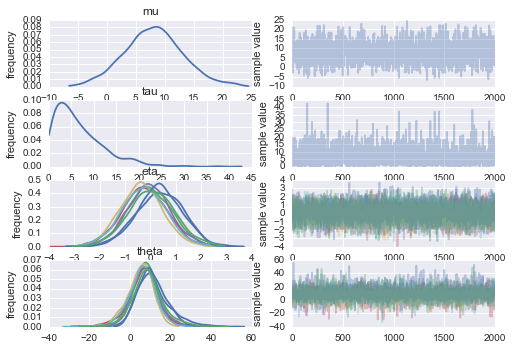

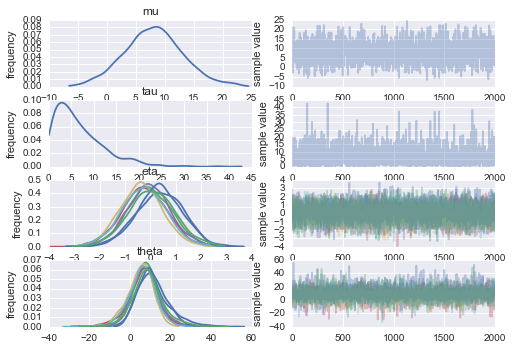

In [12]:
fit.plot()